Loading File

In [12]:
import pandas as pd
# Loads file 
df = pd.read_csv('CCPP_data.csv')

# Displaying first 5 rows of the DataFrame to visualize the data structure and content.
print(df.head())


      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [11]:
# Checking for missing values
print(df.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [13]:
# Checking for outliers
print(df.describe())

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


Correlation Matrix

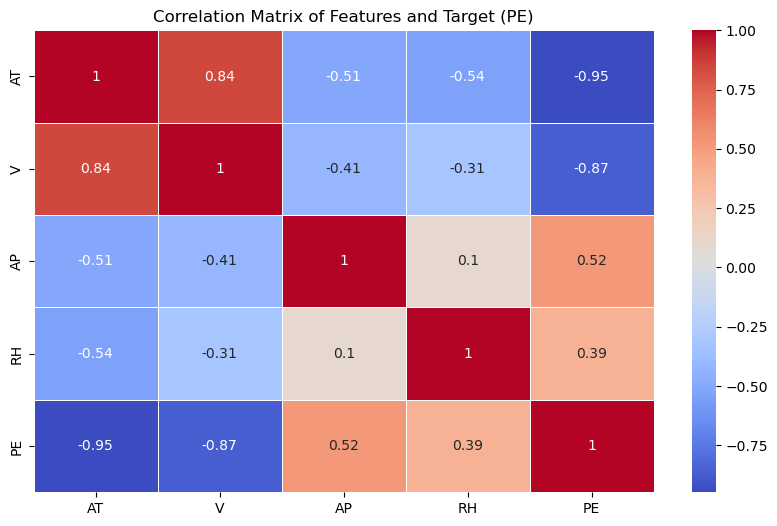

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
correlation_matrix = df.corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (PE)')
plt.show()

Visualizations

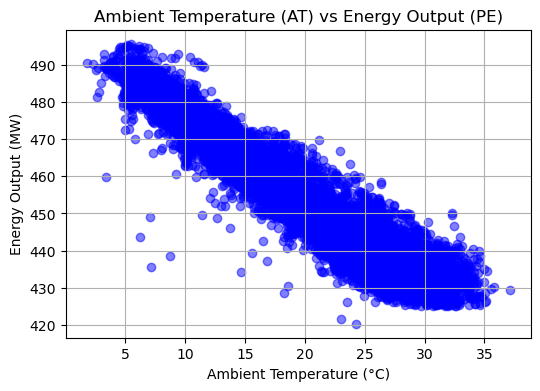

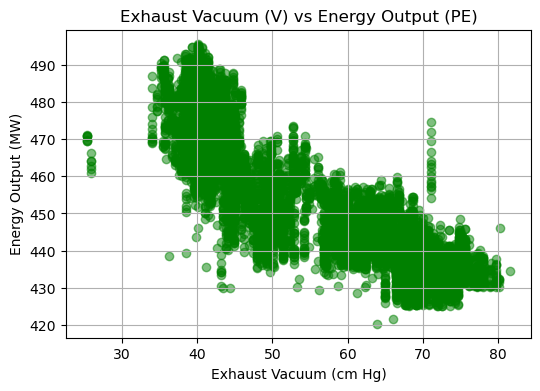

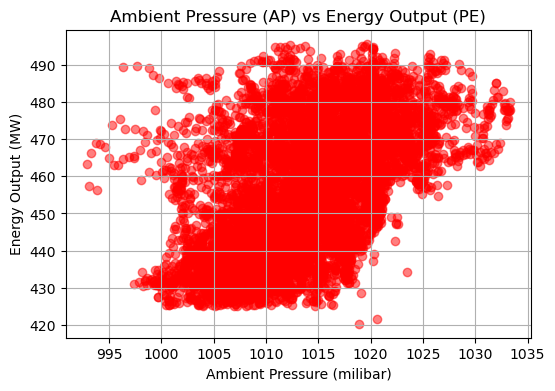

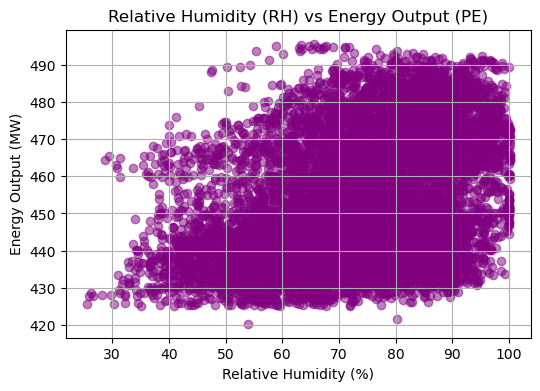

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for AT vs PE
plt.figure(figsize=(6,4))
plt.scatter(df['AT'], df['PE'], color='blue', alpha=0.5)
plt.title('Ambient Temperature (AT) vs Energy Output (PE)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Energy Output (MW)')
plt.grid(True)
plt.show()

# Scatter plot for V vs PE
plt.figure(figsize=(6,4))
plt.scatter(df['V'], df['PE'], color='green', alpha=0.5)
plt.title('Exhaust Vacuum (V) vs Energy Output (PE)')
plt.xlabel('Exhaust Vacuum (cm Hg)')
plt.ylabel('Energy Output (MW)')
plt.grid(True)
plt.show()

# Scatter plot for AP vs PE
plt.figure(figsize=(6,4))
plt.scatter(df['AP'], df['PE'], color='red', alpha=0.5)
plt.title('Ambient Pressure (AP) vs Energy Output (PE)')
plt.xlabel('Ambient Pressure (milibar)')
plt.ylabel('Energy Output (MW)')
plt.grid(True)
plt.show()

# Scatter plot for RH vs PE
plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['PE'], color='purple', alpha=0.5)
plt.title('Relative Humidity (RH) vs Energy Output (PE)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Energy Output (MW)')
plt.grid(True)
plt.show()

# plt.show()

Splitting Data

In [16]:
from sklearn.model_selection import train_test_split
# Splitting data into features (X) and target (y)
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Splitting data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing shapes of training and testing datasets
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (7654, 4) (7654,)
Testing dataset shape: (1914, 4) (1914,)


Linear Regression 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Results:")
print(f"Mean Absolute Error: {mae_lin:.2f}")
print(f"Mean Squared Error: {mse_lin:.2f}")
print(f"R-squared: {r2_lin:.2f}")


Linear Regression Results:
Mean Absolute Error: 3.60
Mean Squared Error: 20.27
R-squared: 0.93


Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regressor Results:")
print(f"Mean Absolute Error: {mae_tree:.2f}")
print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"R-squared: {r2_tree:.2f}")



Decision Tree Regressor Results:
Mean Absolute Error: 3.01
Mean Squared Error: 19.49
R-squared: 0.93



Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = forest_reg.predict(X_test)

# Evaluate the model
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\nRandom Forest Regressor Results:")
print(f"Mean Absolute Error: {mae_forest:.2f}")
print(f"Mean Squared Error: {mse_forest:.2f}")
print(f"R-squared: {r2_forest:.2f}")


Random Forest Regressor Results:
Mean Absolute Error: 2.33
Mean Squared Error: 10.54
R-squared: 0.96


Hyperparameter Tuning 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Updated parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],  
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initializing and running the grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Printing best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, mi

Final Model

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the RandomForestRegressor with the best parameters from grid search
final_forest_reg = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=2, n_estimators=200, random_state=42)

# Training the model on the training data
final_forest_reg.fit(X_train, y_train)

# Making predictions on the test data
final_y_pred = final_forest_reg.predict(X_test)

# Evaluating the model
final_mae = mean_absolute_error(y_test, final_y_pred)
final_mse = mean_squared_error(y_test, final_y_pred)
final_r2 = r2_score(y_test, final_y_pred)

print("\nFinal Random Forest Regressor Results:")
print(f"Mean Absolute Error: {final_mae:.2f}")
print(f"Mean Squared Error: {final_mse:.2f}")
print(f"R-squared: {final_r2:.2f}")




Final Random Forest Regressor Results:
Mean Absolute Error: 2.21
Mean Squared Error: 9.55
R-squared: 0.97


The final metrics display and a feature importance plot

Final Random Forest Regressor Results:
Mean Absolute Error: 2.21
Mean Squared Error: 9.55
R-squared: 0.97


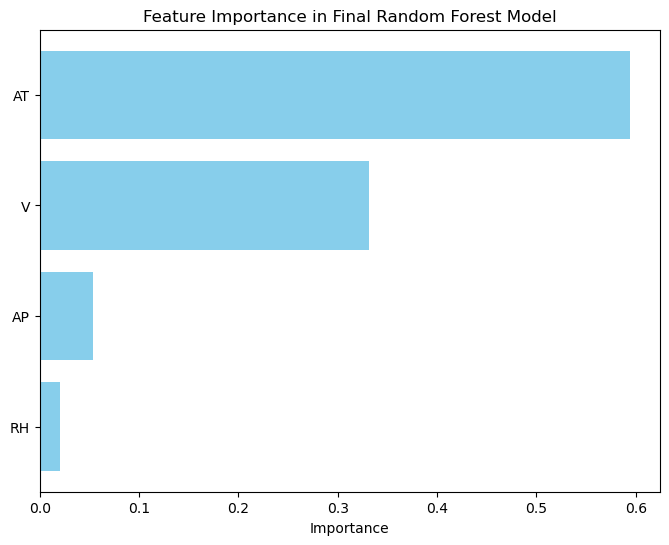

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are defined and final model is trained
# with the best parameters found from GridSearchCV.

# Training the final model using the best parameters found
final_model = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=2, n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)

# Making predictions and calculating final metrics
y_pred_final = final_model.predict(X_test)
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

# Printing the final metrics
print("Final Random Forest Regressor Results:")
print(f"Mean Absolute Error: {mae_final:.2f}")
print(f"Mean Squared Error: {mse_final:.2f}")
print(f"R-squared: {r2_final:.2f}")

# Feature importance plot
importances = final_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Final Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


1. Metrics Calculation: The final MAE, MSE, and R-squared values demonstrate the model’s predictive accuracy.
2. Feature Importance Plot: This bar chart provides a visual of which features have the most impact on the energy output prediction, adding interpretability to your model.